![Trust yourself](https://imgs.xkcd.com/comics/statistics.png)

In [1]:
import numpy as np
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt

We all want our data to look like this:

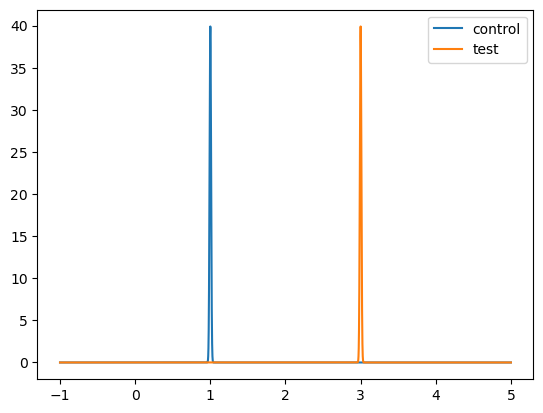

In [2]:
x = np.linspace(-1, 5, 10000)
plt.plot(x, stats.norm(loc=1, scale=1e-2).pdf(x), label='control')
plt.plot(x, stats.norm(loc=3, scale=1e-2).pdf(x), label='test')
plt.legend();

... but, everything we look at (enzymes, cells, molecules) are stochastic.  So they probably look closer to this:

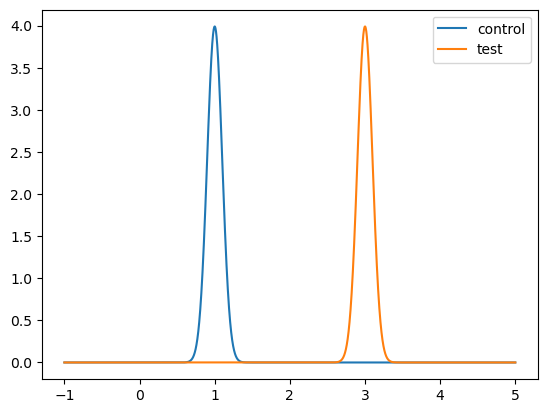

In [3]:
x = np.linspace(-1, 5, 10000)
plt.plot(x, stats.norm(loc=1, scale=0.1).pdf(x), label='control')
plt.plot(x, stats.norm(loc=3, scale=0.1).pdf(x), label='test')
plt.legend();

... and our experiments aren't perfect, so our actual results probably look like this:

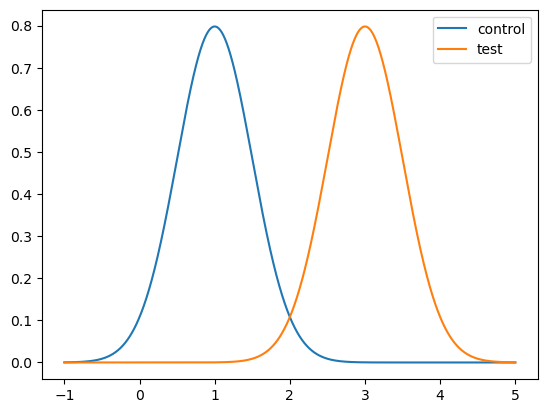

In [4]:
x = np.linspace(-1, 5, 10000)
plt.plot(x, stats.norm(loc=1, scale=0.5).pdf(x), label='control')
plt.plot(x, stats.norm(loc=3, scale=0.5).pdf(x), label='test')
plt.legend();

... except, we don't measure 10,000 data points.  In reality, we do ~3.  So our actual data look like this:

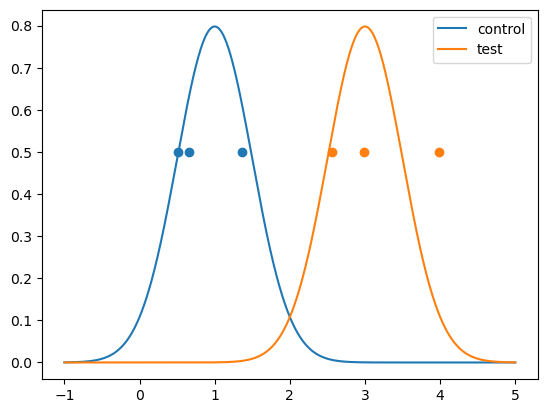

In [5]:
control_data = stats.norm(loc=1, scale=0.5).rvs(3)
test_data    = stats.norm(loc=3, scale=0.5).rvs(3)

x = np.linspace(-1, 5, 10000)
plt.plot(x, stats.norm(loc=1, scale=0.5).pdf(x), label='control')
plt.plot(x, stats.norm(loc=3, scale=0.5).pdf(x), label='test')
plt.scatter(control_data, [0.5]*len(control_data))
plt.scatter(test_data, [0.5]*len(test_data))
plt.legend();

Let's talk about the Normal (Gaussian) distribution and Standard Deviation.

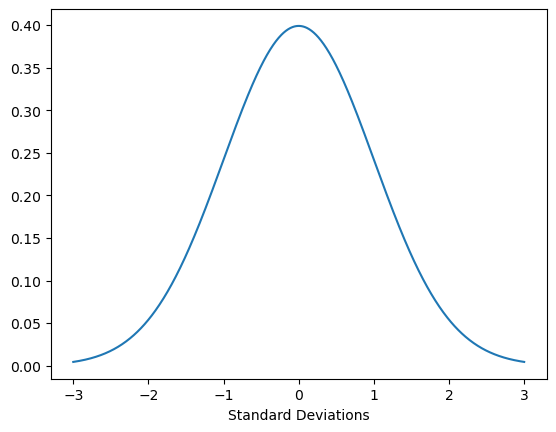

In [6]:
std_x = np.linspace(-3, 3, 1000)
plt.plot(std_x, stats.norm.pdf(std_x))
plt.xlabel('Standard Deviations');

The fraction between 0 and 1 is: 34.13447460685429


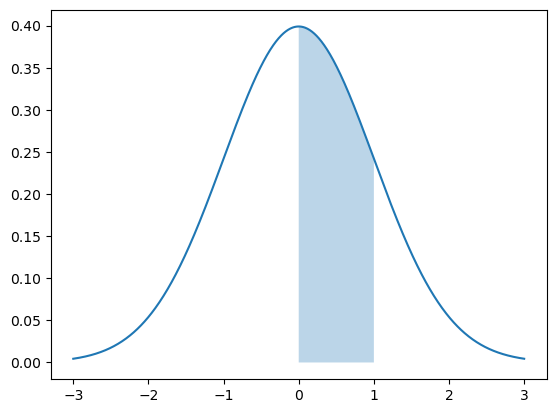

In [7]:
std_x = np.linspace(-3, 3, 1000)
one_sd = np.linspace(0, 1, 100)
plt.plot(std_x, stats.norm.pdf(std_x))
plt.fill_between(one_sd, stats.norm.pdf(one_sd), alpha=0.3)
print('The fraction between 0 and 1 is:', (stats.norm.cdf(1) - stats.norm.cdf(0))*100)

The percent between -1 and 1 is: 68.26894921370858


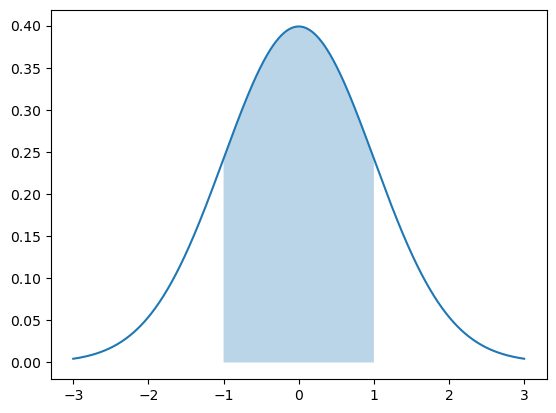

In [8]:
plt.plot(std_x, stats.norm.pdf(std_x))
plt.fill_between(one_sd*2-1, stats.norm.pdf(one_sd*2-1), alpha=0.3)
print('The percent between -1 and 1 is:', (stats.norm.cdf(1) - stats.norm.cdf(-1))*100)

The percent between -2 and 2 is: 95.44997361036415


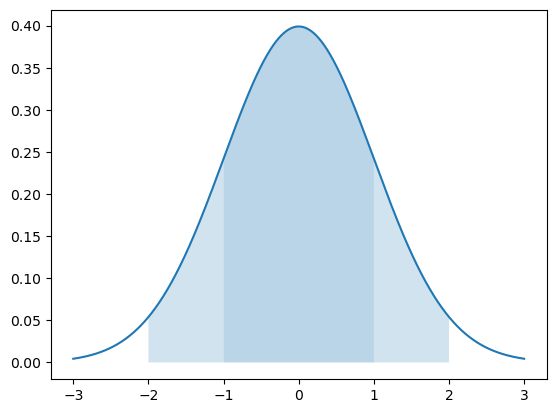

In [9]:
plt.plot(std_x, stats.norm.pdf(std_x))
plt.fill_between(one_sd*2-1, stats.norm.pdf(one_sd*2-1), alpha=0.3)
plt.fill_between(one_sd-2, stats.norm.pdf(one_sd-2), alpha=0.2, color='#1f77b4', edgecolor=None)
plt.fill_between(one_sd+1, stats.norm.pdf(one_sd+1), alpha=0.2, color='#1f77b4', edgecolor=None)
print('The percent between -2 and 2 is:', (stats.norm.cdf(2) - stats.norm.cdf(-2))*100)

**Ah Ha!**  
So if our data come from a Normal distribution, we can say that ~95% of data points *coming from that distribution* will be between -2 and +2 standard deviations (±2 SD) from the *mean* of that distribution.

**But**  This only works if you've collected *hundreds* of replicates so you're *really* sure what your mean and standard deviation values are.  

If you have fewer than than several hundred replicates, you need to apply a correction.  But how?  

The year is 1908, and William Sealy Gosset was *really* into Guiness.
![Portrait of William Sealy Gosset](https://upload.wikimedia.org/wikipedia/commons/thumb/4/42/William_Sealy_Gosset.jpg/400px-William_Sealy_Gosset.jpg)

Gosset was Head Experimental Brewer at Guiness, and was trying to figure out how to make sure the barley they were using was the same batch-to-batch.  Like us, he didn't want to do hundreds of replicates of his measurements.  Instead, he worked out how to adjust the standard deviation estimate using as few as three replicates.  

In 1925 Ronald Fisher combined this adjustment with an idea from 1710:  Comparison of distributions based on the *probability of getting a difference at least as extreme*.  We now call this the **p-value**.  Fisher suggested *One in Twenty* in his work as a "convenient" cutoff.  He also pointed out that the ideas and assumptions needed only make sense if you choose your p-value cutoff and number of samples **before** collecting any data.

William Sealy Gosset wasn't allowed to publish his work in his real name, as Guiness was worried their competitors would use it to improve the quality of their stout.  (He also couldn't mention Guiness or make any reference to "beer".)  Instead, he used a pseudonym based on the title printed on the notebook he was using while writing the paper  - "The Student's Science Notebook".

### Student's t-test
Student's t-test makes the following assumptions:
* The data points come from a population that is Normally distributed
* All the data points are independently distributed (all the errors are random)
* The magnitude of the error for each data point is the same, regardless of the value  

The t-test comes in two 'flavors': one-tailed and two-tailed.

In [10]:
from scipy.stats import ttest_ind

### One vs two-tailed t-test  
If you *know* that one value is going to be bigger than the other, you can do a one-tailed t-test.
* **NO**: Enzyme activity vs temperature / regulator; Cell doubling time with factors; etc...
* **YES**:  Enzyme activity within a temperature range where you know the change is monotonic, etc...


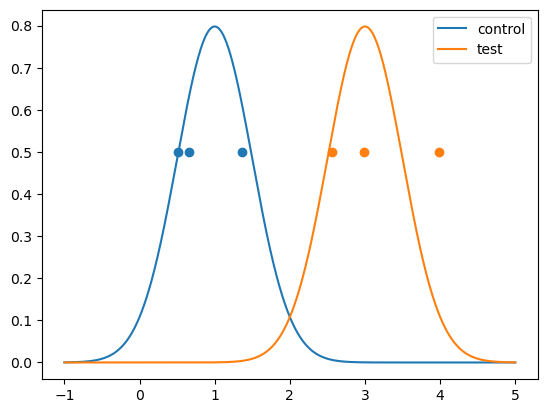

In [11]:
plt.plot(x, stats.norm(loc=1, scale=0.5).pdf(x), label='control')
plt.plot(x, stats.norm(loc=3, scale=0.5).pdf(x), label='test')
plt.scatter(control_data, [0.5]*len(control_data))
plt.scatter(test_data, [0.5]*len(test_data))
plt.legend();

In [12]:
t_test = ttest_ind(control_data, test_data, alternative='less')  # First distribution is less than second
print(t_test)

Ttest_indResult(statistic=-4.702972358352082, pvalue=0.004643957379145503)


In [13]:
if t_test.pvalue < 0.05:
    print('We reject the null hypothesis with a p-value of', t_test.pvalue)
else:
    print('We failed to reject the null hypothesis with a p-value of', t_test.pvalue)

We reject the null hypothesis with a p-value of 0.004643957379145503


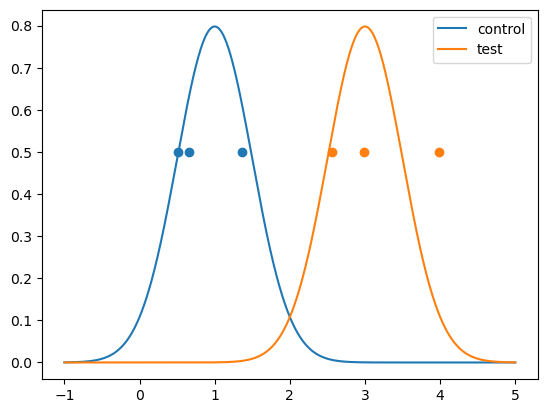

In [14]:
plt.plot(x, stats.norm(loc=1, scale=0.5).pdf(x), label='control')
plt.plot(x, stats.norm(loc=3, scale=0.5).pdf(x), label='test')
plt.scatter(control_data, [0.5]*len(control_data))
plt.scatter(test_data, [0.5]*len(test_data))
plt.legend();

In [15]:
t_test = ttest_ind(control_data, test_data)
print(t_test)
if t_test.pvalue < 0.05:
    print('We reject the null hypothesis with a p-value of', t_test.pvalue)
else:
    print('We failed to reject the null hypothesis with a p-value of', t_test.pvalue)

Ttest_indResult(statistic=-4.702972358352082, pvalue=0.009287914758291006)
We reject the null hypothesis with a p-value of 0.009287914758291006


#### Two-tailed t-test

We reject the null hypothesis with a p-value of 0.005557041042965768


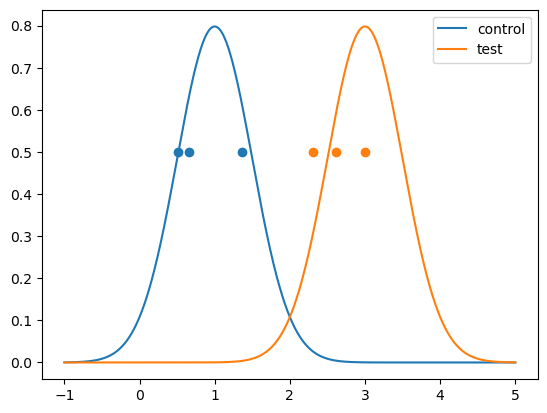

In [16]:
test_mean = 3
test_sd = 0.5
test_data_alt = stats.norm(loc=test_mean, scale=0.5).rvs(3)
plt.plot(x, stats.norm(loc=1, scale=0.5).pdf(x), label='control')
plt.plot(x, stats.norm(loc=test_mean, scale=test_sd).pdf(x), label='test')
plt.scatter(control_data, [0.5]*len(control_data))
plt.scatter(test_data_alt, [0.5]*len(test_data))
plt.legend();

t_test = ttest_ind(control_data, test_data_alt)
if t_test.pvalue < 0.05:
    print('We reject the null hypothesis with a p-value of', t_test.pvalue)
else:
    print('We FAILED TO REJECT the null hypothesis with a p-value of', t_test.pvalue)

### What about non-Normal distributions?

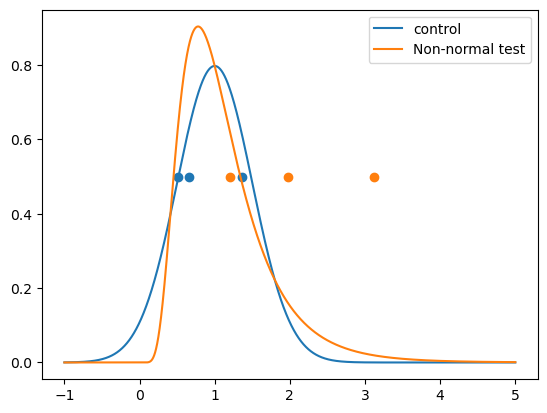

In [17]:
s, loc, scale = 0.5, 0, 1
non_normal_test_distribution = stats.lognorm(s=s, loc=loc, scale=scale)
test_data_not_Norm = non_normal_test_distribution.rvs(3)

plt.plot(x, stats.norm(loc=1, scale=0.5).pdf(x), label='control')
plt.plot(x, non_normal_test_distribution.pdf(x), label='Non-normal test')
plt.scatter(control_data, [0.5]*len(control_data))
plt.scatter(test_data_not_Norm, [0.5]*len(test_data))
plt.legend();

In [18]:
t_test = ttest_ind(control_data, test_data_not_Norm)
if t_test.pvalue < 0.05:
    print('We reject the nulll hypothesis with a p-value of', t_test.pvalue)
else:
    print('We FAILED TO REJECT the nulll hypothesis with a p-value of', t_test.pvalue)

We FAILED TO REJECT the nulll hypothesis with a p-value of 0.1107775442375762


We FAILED TO REJECT the nulll hypothesis with a p-value of 0.1369838314908075


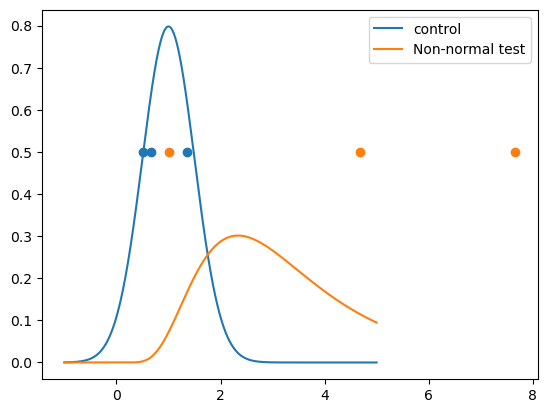

In [19]:
s, loc, scale = 0.5, 0, 3

non_normal_test_distribution = stats.lognorm(s=s, loc=loc, scale=scale)
test_data_not_Norm = non_normal_test_distribution.rvs(3)
alt_x = np.linspace(-1, 5, 10000)
plt.plot(alt_x, stats.norm(loc=1, scale=0.5).pdf(alt_x), label='control')
plt.plot(alt_x, non_normal_test_distribution.pdf(alt_x), label='Non-normal test')
plt.scatter(control_data, [0.5]*len(control_data))
plt.scatter(test_data_not_Norm, [0.5]*len(test_data))
plt.legend()

t_test = ttest_ind(control_data, test_data_not_Norm)
if t_test.pvalue < 0.05:
    print('We reject the nulll hypothesis with a p-value of', t_test.pvalue)
else:
    print('We FAILED TO REJECT the nulll hypothesis with a p-value of', t_test.pvalue)

![Mostly absurd ways to fit data](https://imgs.xkcd.com/comics/curve_fitting.png)

# Fitting
We fit data to functions not because it makes *pretty plots*, but because we care about the parameters of those functions.  

For example, let's fit single-site binding:
$$\large [Complex] = \frac{[Total Protein][L]}{K_d+[L]}$$  

or  

$$\large [Fraction Bound] = \frac{[L]}{K_d+[L]}$$
where $Fraction Bound$ is what we measure, $[L]$ is the concentration of the ligand, and the protein concentration is much higher than the ligand concentration (at least 10-fold, preferably >100 fold).

We need a few things when fitting
* A function to fit
* Data to fit
* A function to do the fitting
* An initial guess (maybe)

#### A function to fit
$$[Fraction Bound] = \frac{[L]}{K_d+[L]}$$

In [20]:
def single_site_binding(ligand, kd):
    fraction_bound = ligand / (kd + ligand)
    return fraction_bound

In [21]:
# !pip install ipywidgets
from ipywidgets import interact, FloatSlider, BoundedFloatText
def p(kd):
    x = np.linspace(0, 5, 1000)
    plt.plot(x, single_site_binding(x, kd=kd))
    plt.ylim(0,1)
kd_widget = BoundedFloatText(min=0.1, max=10.0, step=0.05, value=1.0, description='$K_d$')
interact(p, kd=kd_widget);

interactive(children=(BoundedFloatText(value=1.0, description='$K_d$', max=10.0, min=0.1, step=0.05), Output()…

#### (Fake) Data at various ligand concentrations

In [22]:
ligand_concentrations = np.array([0, 0.1, 0.2, 0.5, 1.0])

fake_kd = 0.3
signal = single_site_binding(ligand_concentrations, kd=fake_kd)

print(signal)

[0.         0.25       0.4        0.625      0.76923077]


*Asside*:  Now we're on to (x, y) things.  In *ye olde* days, we would have used Excel here.  Instead, we're going to use Python's spreadsheet library: **Pandas**

In [23]:
import pandas as pd
fake_data = pd.DataFrame({'ligand concentration': ligand_concentrations,
                          'signal'              : signal})
fake_data

,ligand concentration,signal
0,0.0,0.000000
1,0.1,0.250000
2,0.2,0.400000
3,0.5,0.625000
4,1.0,0.769231


#### Always look at your data!

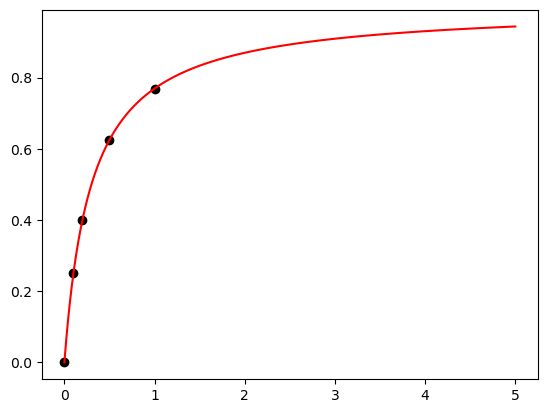

In [24]:
x = np.linspace(0, 5, 1000)
plt.plot(x, single_site_binding(x, kd=fake_kd), color='red')
plt.scatter(fake_data['ligand concentration'], fake_data['signal'], color='black');

#### Always look at your data!

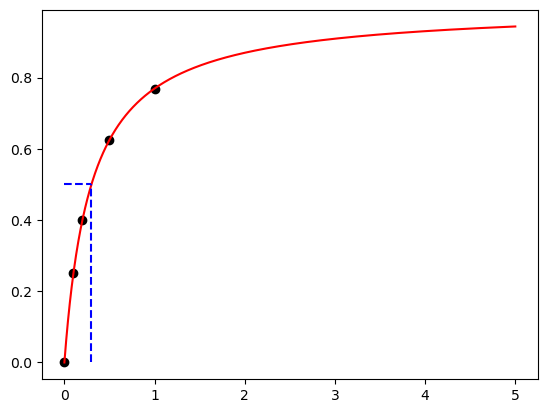

In [25]:
plt.plot(x, single_site_binding(x, kd=fake_kd), color='red')
plt.scatter(fake_data['ligand concentration'], fake_data['signal'], color='black')
plt.hlines(1/2, 0, fake_kd, color='blue', linestyle='dashed') 
plt.vlines(fake_kd, 0, single_site_binding(fake_kd, kd=fake_kd), color='blue', linestyle='dashed');

*NB: The rule of thumb for fitting binding data is to go up to 5 $\times K_{d}$ to approximate the asymptote.  This is not required when fitting by computer, but your fit errors will be larger if you don't!*

#### A function to do the fitting

There are LOTS of ways to fit data in `scipy`, but the easiest is called `curve_fit`

In [26]:
from scipy.optimize import curve_fit

`curve_fit` requires the function to fit, the x-data, and the y-data *in that order*.  It gives you back the fitted parameters, and the covariance matrix (more on that later...)

In [27]:
fitted_parameters, covariance_matrix = curve_fit(single_site_binding,
                                                 fake_data['ligand concentration'],
                                                 fake_data['signal'])
print('The fitted Kd is:', fitted_parameters)

The fitted Kd is: [0.3]


The other thing you may want are the errors.  This is where that covariance matrix is used.  The standard deviation on the errors is given by this bit of code:

In [28]:
standard_deviations = np.sqrt(np.diag(covariance_matrix))
print('The standard deviations on the parameters are:', standard_deviations)

The standard deviations on the parameters are: [0.]


In [29]:
# (Generate some data from a combination of binding curves, then add some error.)
# Fit the new dataset
# plot with boxplot and confidence intervals
# show confidence intervals
# plot residuals

In [30]:
replicate_ligand_concentrations = np.array([0, 0.1, 0.2, 0.5, 1.0]*3)
replicate_signal = single_site_binding(replicate_ligand_concentrations, kd=fake_kd)
replicate_signal

array([0.        , 0.25      , 0.4       , 0.625     , 0.76923077,
       0.        , 0.25      , 0.4       , 0.625     , 0.76923077,
       0.        , 0.25      , 0.4       , 0.625     , 0.76923077])

In [31]:
replicate_signal += stats.norm(scale=0.05).rvs(15)
replicate_signal

array([ 0.09575051,  0.22566592,  0.43003717,  0.63270081,  0.79518046,
       -0.06814516,  0.25892303,  0.34288596,  0.64281339,  0.73944138,
       -0.01481704,  0.29309563,  0.38781939,  0.59260139,  0.72314934])

#### Error and Replicates

In [32]:
data = pd.DataFrame({'ligand concentration': [0, 0.1, 0.2, 0.5, 1.0],
                     'rep1': [ 0.09078967,  0.2850973 ,  0.39320624,  0.67290995,  0.74411434],
                     'rep2': [-0.00748307,  0.27509984,  0.47704407,  0.57920601,  0.78707877],
                     'rep3': [0.00504795,  0.22195678,  0.33553646,  0.56281805,  0.80117412],
                    })
# data = data.set_index('ligand concentration', drop=True)
data

,ligand concentration,rep1,rep2,rep3
0,0.0,0.090790,-0.007483,0.005048
1,0.1,0.285097,0.275100,0.221957
2,0.2,0.393206,0.477044,0.335536
3,0.5,0.672910,0.579206,0.562818
4,1.0,0.744114,0.787079,0.801174


In [33]:
df = pd.melt(data, id_vars=['ligand concentration'])
df

,ligand concentration,variable,value
0,0.0,rep1,0.090790
1,0.1,rep1,0.285097
2,0.2,rep1,0.393206
3,0.5,rep1,0.672910
4,1.0,rep1,0.744114
5,0.0,rep2,-0.007483
6,0.1,rep2,0.275100
7,0.2,rep2,0.477044
8,0.5,rep2,0.579206
9,1.0,rep2,0.787079


In [34]:
df = pd.melt(data, id_vars=['ligand concentration'])
r_fitted_parameters, r_covariance_matrix = curve_fit(single_site_binding,
                                                     df['ligand concentration'],
                                                     df['value'])
r_standard_deviations = np.sqrt(np.diag(r_covariance_matrix))

print('The parameters for single_site_binding are:', r_fitted_parameters)
print('The standard deviations on the parameters are:', r_standard_deviations)

The parameters for single_site_binding are: [0.30128567]
The standard deviations on the parameters are: [0.0194376]


#### Always look at your data!

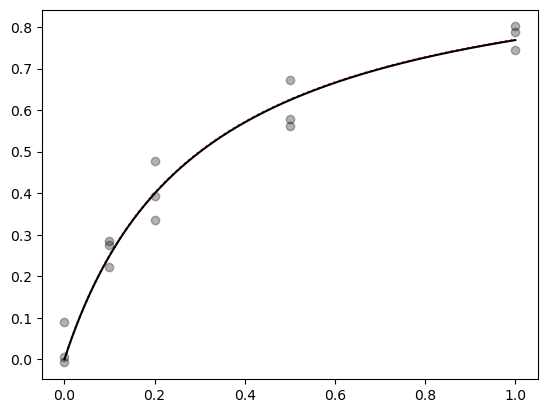

In [35]:
short_x = np.linspace(0,1,1000)
plt.plot(short_x, single_site_binding(short_x, kd=fake_kd), color='red', linestyle='dotted')
plt.plot(short_x, single_site_binding(short_x, kd=r_fitted_parameters[0]), color='black')
plt.scatter(df['ligand concentration'], df['value'], color='black', alpha=0.3);

#### Always look at your data!

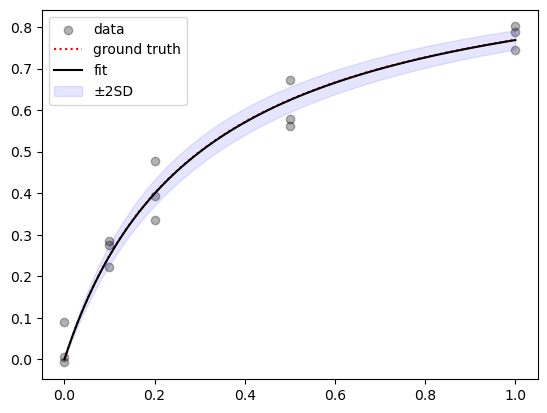

In [36]:
plt.scatter(df['ligand concentration'], df['value'], color='black', alpha=0.3, label='data');
plt.plot(short_x, single_site_binding(short_x, kd=fake_kd),
         color='red', linestyle='dotted', label='ground truth')
plt.plot(short_x, single_site_binding(short_x, kd=r_fitted_parameters[0]),
         color='black', label='fit')

plus_2sd_kd  = r_fitted_parameters[0] + 2 * r_standard_deviations[0]
minus_2sd_kd = r_fitted_parameters[0] - 2 * r_standard_deviations[0]

bound_upper = single_site_binding(short_x, minus_2sd_kd)
bound_lower = single_site_binding(short_x, plus_2sd_kd)
plt.fill_between(short_x, bound_upper, bound_lower, color = 'blue', alpha = 0.1, label='±2SD');
plt.legend();

Why doesn't it look 'right'?  
*We didn't fit a zero-offset, but our data have a zero-offset.*

The computer is only as good as you are.  Always look at your data and analysis and ask:  
**Is that right?  Do I believe that?**

In [37]:
zeroed_offset_data = data.copy()
for col in zeroed_offset_data.columns[1:]:
    zeroed_offset_data[col] = zeroed_offset_data[col] - zeroed_offset_data[col][0]
zeroed_offset_data

,ligand concentration,rep1,rep2,rep3
0,0.0,0.000000,0.000000,0.000000
1,0.1,0.194308,0.282583,0.216909
2,0.2,0.302417,0.484527,0.330489
3,0.5,0.582120,0.586689,0.557770
4,1.0,0.653325,0.794562,0.796126


In [38]:
zero_offset_df = pd.melt(zeroed_offset_data, id_vars=['ligand concentration'])
r_z_fitted_parameters, r_z_covariance_matrix = curve_fit(single_site_binding,
                                                     zero_offset_df['ligand concentration'],
                                                     zero_offset_df['value'])
r_z_standard_deviations = np.sqrt(np.diag(r_z_covariance_matrix))
print('The parameters for single_site_binding are:', r_z_fitted_parameters)
print('The standard deviations on the parameters are:', r_z_standard_deviations)

The parameters for single_site_binding are: [0.34622795]
The standard deviations on the parameters are: [0.0247495]


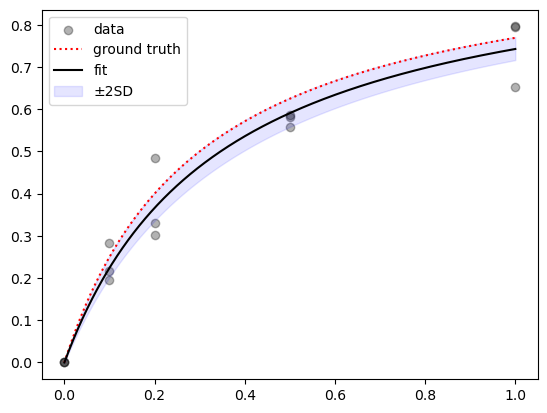

In [39]:
plt.scatter(zero_offset_df['ligand concentration'], zero_offset_df['value'], color='black', alpha=0.3, label='data');
plt.plot(short_x, single_site_binding(short_x, kd=fake_kd),
         color='red', linestyle='dotted', label='ground truth')
plt.plot(short_x, single_site_binding(short_x, kd=r_z_fitted_parameters[0]),
         color='black', label='fit')

plus_2sd_kd  = r_z_fitted_parameters[0] + 2 * r_z_standard_deviations[0]
minus_2sd_kd = r_z_fitted_parameters[0] - 2 * r_z_standard_deviations[0]

bound_upper = single_site_binding(short_x, minus_2sd_kd)
bound_lower = single_site_binding(short_x, plus_2sd_kd)
plt.fill_between(short_x, bound_upper, bound_lower, color = 'blue', alpha = 0.1, label='±2SD');
plt.legend();

Does it look 'right' now?

The computer is only as good as you are. Always look at your data and analysis and ask:  
**Is that right? Do I believe that?**

## Reality
Generally, we don't work in the regime where the $[protein] >> [ligand]$.  Instead, we tend to work in $[protein] \approx [ligand]$.  To model this correctly, we need this equation:  

$$\tiny [Complex] = \frac{K_{d} + [ligand]_{0} + [protein]_{0} - \sqrt{K_{d}^{2} + 2 K_{d} [ligand]_{0} + 2 K_{d} [protein]_{0} + [ligand]_{0}^{2} - 2 [ligand]_{0} [protein]_{0} + [protein]_{0}^{2}}}{2} $$

In [40]:
def bimolecular(ligand, protein, kd):
    sqrt_ = kd**2 + 2*kd*ligand + 2*kd*protein + ligand**2 - 2*protein*ligand + protein**2 
    ab = kd + protein + ligand - np.sqrt(sqrt_)
    return ab/2

$$\tiny [Complex] = \frac{K_{d} + [ligand]_{0} + [protein]_{0} - \sqrt{K_{d}^{2} + 2 K_{d} [ligand]_{0} + 2 K_{d} [protein]_{0} + [ligand]_{0}^{2} - 2 [ligand]_{0} [protein]_{0} + [protein]_{0}^{2}}}{2} $$

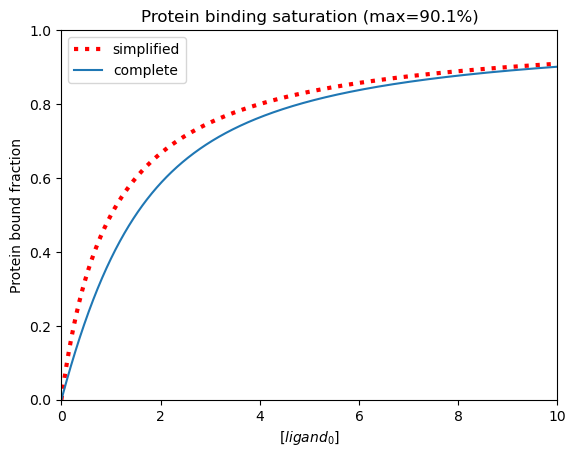

In [41]:
def p(max_ligand_concentration, protein_concentration, kd):
    ligand_concentration = np.linspace(0, max_ligand_concentration, 1000)
    binding_curve = bimolecular(ligand_concentration, protein_concentration, kd)/protein_concentration
    plt.plot(ligand_concentration, single_site_binding(ligand_concentration, kd=kd),
         color='red', linestyle='dotted', lw=3, label='simplified')
    plt.plot(ligand_concentration, binding_curve, label='complete')
    plt.xlabel('$[ligand_0]$')
    plt.ylabel('Protein bound fraction')
    plt.xlim(0,max_ligand_concentration)
    plt.ylim(0,1)
    plt.legend()
    plt.title(f'Protein binding saturation (max={binding_curve[-1]*100:0.1f}%)')
p(max_ligand_concentration=10, protein_concentration=1, kd=1)

In [42]:
kd_widget = BoundedFloatText(min=0.001, max=1000.0, step=0.1, value=1.0, description='$K_d$')
ligand_widget = BoundedFloatText(min=0, max=1000.0, step=0.1, value=10.0, description='[Ligand]')
protein_widget = BoundedFloatText(min=0, max=1000.0, step=0.1, value=0.01, description='[Protein]')

interact(p, max_ligand_concentration=ligand_widget, protein_concentration=protein_widget, kd=kd_widget);

interactive(children=(BoundedFloatText(value=10.0, description='[Ligand]', max=1000.0, step=0.1), BoundedFloat…